In [2]:
import matplotlib.pyplot as plt
import numpy as np
# from scipy.optimize import curve_fit


### Oscillatore

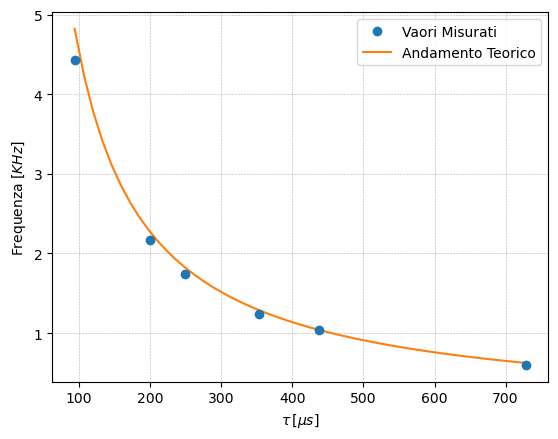

In [3]:
r = np.array([ 1.349 , 2.855 , 3.566 , 5.045 , 6.243 , 10.4]) * 1e3
f = np.array([ 4.43 , 2.163,  1.743 , 1.245 , 1.04 , 0.600]) * 1e3

r12 = 9e3

c = 70e-9

tau = r*c 

def freq(tau ,r1 , r2):
    return 1 / (2* tau * np.log((r2+2*r1)/(r2)))

tau_fit = np.linspace(tau[0] , tau[-1])
freq_fit = freq(tau_fit , r12  , r12)


tau *= 1e6
tau_fit *= 1e6
f *= 1e-3
freq_fit *= 1e-3

plt.plot(tau , f , marker = "o" , linestyle ="" , zorder = 10 , label = "Vaori Misurati")
plt.plot(tau_fit , freq_fit , label ="Andamento Teorico")
plt.xlabel(r"$\tau\, [\mu s]$")
plt.ylabel(r"Frequenza $[KHz]$")

plt.legend()
plt.grid(which="major" , linestyle = "--" , linewidth = 0.4)
plt.savefig("./immagini/ocillatore/freq_tau.png" , dpi=500, bbox_inches='tight')

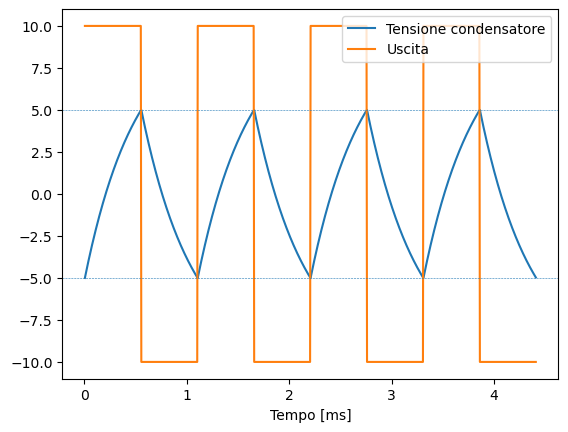

In [76]:
vdd = 10            #[V]
vss = -vdd          #[V]
tau = 500e-6        #[s]
partitore = 0.5

t_carica = np.linspace(0 , 2.5e-3 , 500)
t_scarica = np.linspace(0 , 2.5e-3 , 500)

sogliaH = vdd * partitore
sogliaL = vss * partitore

carica = vdd + (sogliaL - vdd) * np.exp(-t_carica/tau)
scarica = vss + (sogliaH - vss) * np.exp(-t_scarica/tau)


mask_carica = carica < sogliaH
mask_scarica = scarica > sogliaL

carica = carica[mask_carica]
scarica = scarica[mask_scarica]

t_carica = t_carica[mask_carica]
t_scarica = t_scarica[mask_scarica]


def carica_scarica_output(serie: int):
    delta = t_carica[1] - t_carica[0]
    lunghezza = len(t_carica)
    x = np.zeros(serie * lunghezza)
    t = np.zeros(serie * lunghezza)
    out = np.zeros(serie * lunghezza)
    for i in range(serie):
        if i % 2 == 0:
            valori_x = carica
            valori_t = t[i*lunghezza-1] + t_carica + delta
            valori_out = np.ones(lunghezza) * vdd
        else:
            valori_x = scarica
            valori_t = t[i*lunghezza-1] + t_scarica + delta
            valori_out = np.ones(lunghezza) * vss

        x[i*lunghezza : (i+1)*lunghezza] = valori_x
        t[i*lunghezza : (i+1)*lunghezza] = valori_t 
        out[i*lunghezza : (i+1)*lunghezza] = valori_out 
    return x,t , out


x , t  , out = carica_scarica_output(8)
t *= 1e3

plt.plot(t, x , label="Tensione condensatore")
plt.plot(t, out , label= "Uscita")

plt.axhline(sogliaH  , linestyle ="--" , linewidth = 0.4)
plt.axhline(sogliaL  , linestyle ="--" , linewidth = 0.4)

plt.xlabel("Tensione [V]")
plt.xlabel("Tempo [ms]")

plt.legend(loc = "upper right")
plt.savefig("./immagini/ocillatore/oscillatore_esempio_carica_scarica.png" , dpi=500, bbox_inches='tight')
